In [ ]:
# Importer les librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
import pickle

In [ ]:
# 2. Collecte de donnees

In [ ]:
# Lecture de la base de donnees
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#pd.set_option('display.max_rows', df.shape[0]+1)
#df

# Cette option est faite pour visualiser toutes donnees de la base

In [ ]:
# Il y'a des valeures manquantes dans cette base: Nan

In [ ]:
pd.set_option('display.max_rows', 10)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
# Voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Voir le nombre de valeures manquantes pour chaque colonne
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
Length: 13, dtype: int64

In [ ]:
# Voir toutes les informations de ma base
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# 3. Nettoyage des donnees

In [ ]:
# Renseigner les valeurs manquantes
#pour cela divisons notre base en variabes cathegoriques d'une part et numeriques d'autre part
cat_data = []
num_data = []
for i, c in enumerate(df.dtypes):
  if c == object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()


In [ ]:
#Pour les variables cathegoriques on remplace les valeurs manquantes par les valeur qui se repetent le plus
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any() #pour verifier s'il y'a valeur manquante ou pas (False s'il  n'y en a pas)

False

In [ ]:
#Pour les variables numériques on remplace les valeurs manquantes par la valeur precedente de la meme colonne
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() #pour verifier s'il y'a valeur manquante ou pas (False s'il  n'y en a pas)

False

In [ ]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [ ]:
#Variables target. Remplacons les 'yes' 'no' par 0 et 1
target_value = {"Y":1, "N":0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)
target = target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
#Remplacer les valeurs cathegoriques par des valeurs numeriques 0, 1, 2, ...
le = LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [ ]:
#SUpprimer la colone Loan_ID
cat_data.drop('Loan_ID', axis=1, inplace=True)

In [ ]:
#Concatenation cat_data et num_data
x = pd.concat([cat_data, num_data], axis=1)
y = target

In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
# 4. Analyse exploitoire


In [ ]:
#Commencons par la variable target (cible)
target.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
# La base de donnees utiliser pour EDA
df = pd.concat([cat_data, num_data, target], axis=1)

Pourcentage de credit accorder est : 0.3127035830618892
Pourcentage de credit refuser est : 0.6872964169381107


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


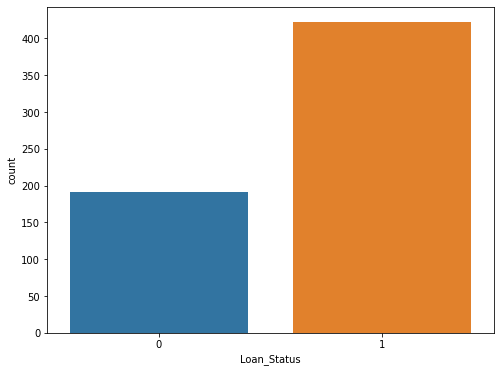

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(target)
yes = target.value_counts()[0]/len(target)
no = target.value_counts()[1]/len(target)
print(f'Pourcentage de credit accorder est : {yes}')
print(f'Pourcentage de credit refuser est : {no}')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


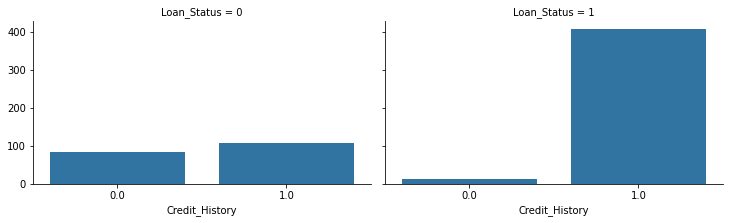

In [ ]:
# Credit history
grid = sns.FacetGrid(df, col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


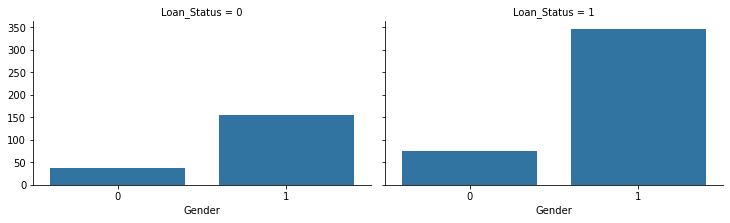

In [ ]:
# Gender
grid = sns.FacetGrid(df, col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


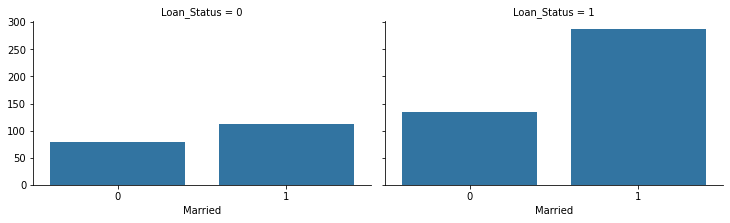

In [ ]:
# les maries
grid = sns.FacetGrid(df, col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


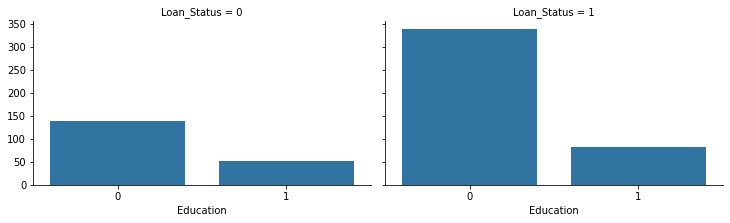

In [ ]:
# Education
grid = sns.FacetGrid(df, col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')

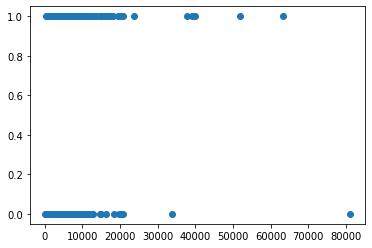

In [ ]:
# Revenu du demandeur
plt.scatter(df['ApplicantIncome'], df['Loan_Status'])

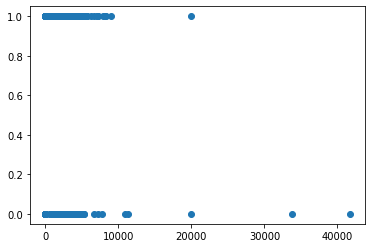

In [ ]:
plt.scatter(df['CoapplicantIncome'], df['Loan_Status'])

In [ ]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1,1,0,0,0,1,3833.5,268.0,132.5,360.0,1.0
1,1,1,0,0,0,1,3812.5,1239.5,127.5,360.0,1.0


In [ ]:
# 5. Preparation du modele

# Divisons la base de donnees en donnees de test et d'entrainement
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(x, y):
  x_train, x_test = x.iloc[train], x.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]

print('x_train taille :', x_train.shape)
print('x_test taille :', x_test.shape)
print('y_train taille :', y_train.shape)
print('y_test taille :', y_test.shape)

x_train taille : (491, 11)
x_test taille : (123, 11)
y_train taille : (491,)
y_test taille : (123,)


In [ ]:
# On va appliquer trois algorithmes: logistic regression, KNN, DecisionTree
models = {
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1, random_state=42)
  }
# La fonction de precision
def accu(y_true, y_pred, retu =False):
  acc=accuracy_score(y_true, y_pred)
  if retu:
    return acc
  else:
    print(f'La precision du modele est : {acc}')
# La fonction d'application du modele
def train_test_eval(models, x_train, y_train, x_test, y_test):
  for name, model in models.items():
    print(name, ':')
    # Entrainons le model
    model.fit(x_train, y_train)
    # Evaluations du modele
    accu(y_test, model.predict(x_test))
    print('-'*30)
train_test_eval(models, x_train, y_train, x_test, y_test)



LogisticRegression :
La precision du modele est : 0.8536585365853658
------------------------------
KNeighborsClassifier :
La precision du modele est : 0.6504065040650406
------------------------------
DecisionTreeClassifier :
La precision du modele est : 0.8455284552845529
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Ameliorons notre modele, creons une nouvelle bese
x_2 = x[['Credit_History', 'Married','CoapplicantIncome']]

In [ ]:
# definissons de nouvelles variales train et test
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train, test in sss.split(x_2, y):
  x_train, x_test = x_2.iloc[train], x_2.iloc[test]
  y_train, y_test = y.iloc[train], y.iloc[test]

print('x_train taille :', x_train.shape)
print('x_test taille :', x_test.shape)
print('y_train taille :', y_train.shape)
print('y_test taille :', y_test.shape)

x_train taille : (491, 3)
x_test taille : (123, 3)
y_train taille : (491,)
y_test taille : (123,)


In [ ]:
train_test_eval(models, x_train, y_train, x_test, y_test)

LogisticRegression :
La precision du modele est : 0.8536585365853658
------------------------------
KNeighborsClassifier :
La precision du modele est : 0.6991869918699187
------------------------------
DecisionTreeClassifier :
La precision du modele est : 0.8455284552845529
------------------------------


In [ ]:
# Appliquer la regression logistique sur notre base de donnees
Classifier = LogisticRegression()
Classifier.fit(x_2, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Enregistrer le model pour le deploiemment
pickle.dump(Classifier, open('model.pkl','wb'))